# Markov Chains

## Inleiding
Een flumph leeft in één van de drie toestanden: Hongerig, Tevreden of Opgejaagd.  
Gebaseerd op de toestand van een flumph op een dag kan berekend worden wat de toestand
is van deze flumph op de dag erna.

## Aanpak
De waarschijnlijkheden worden neergezet in een transitie matrix.  
Wanneer de Markov Chain $N$ verschillende toestanden heeft,
dan is de matrix van deze Markov Chain $N \times N$.  
Verder moet de som van iedere kolom in de matrix uitkomen op precies 1.
Dit is logisch, omdat iedere kolom zijn eigen distributie van waarschijnlijkheden voorstelt.

## Uitwerking
Allereerst wordt de onderstaande tabel omgezet in een matrix:  
$\begin{array} {|r|r|}
    \hline   & Morgen\;Hongerig & Morgen\;Tevreden & Morgen\;Opgejaagd \\
    \hline Vandaag\;Hongerig & 80\% & 10\% & 10\% \\
    \hline Vandaag\;Tevreden & 40\% & 50\% & 10\% \\
    \hline Vandaag\;Opgejaagd & 60\% & 20\% & 20\% \\
    \hline 
    \end{array}$  
Ook heeft een pasgeboren Flumph een eigen beginvector.
Hierin is heeft hij 10% kans op hongerig, 70% kans op tevreden en 20% kans op opgejaagd.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# the original chance matrix of a flumph
chance_matrix = [[0.8, 0.4, 0.6],
                 [0.1, 0.5, 0.2],
                 [0.1, 0.1, 0.2]]

# the chance vector of a newborn flumph
orig_vector = [[0.1],
               [0.7],
               [0.2]]


Om de toestand te kunnen voorspellen over meerdere dagen kan gebruik gemaakt worden
van vector-matrix multiplicatie.  
Hiervoor kan dan de volgende formule gebruikt worden:  
$[transition\;matrix]^m \cdot [initial\;state\;vector] = [m\;state\;probabilities]$  
Hierin wordt de begin vector gemultipliceerd met de transitie matrix, nadat de transitie matrix tot de macht $m$
verheven is. De $m$ is hierbij het aantal dagen dat vooruit wordt gekeken.
De matrix die uit deze multiplicatie komt zijn de waarschijnlijkheden van de staten over een $m$ aantal dagen.

Om bijvoorbeeld de kansen van een flumph van één dag oud uit te rekenen wordt de volgende berekening gedaan:  
Allereerst worden de begin vector en de toestand matrix gedefineerd.  
$M =
\begin{bmatrix}
  0.8 & 0.4 & 0.6 \\
  0.1 & 0.5 & 0.2 \\
  0.1 & 0.1 & 0.2 \\
\end{bmatrix}
$  
$\overrightarrow{a} = 
\begin{bmatrix}
    0.1\\
    0.7\\
    0.2\\
\end{bmatrix}$  
Hierna wordt de volgende berekening toegepast:  
$\overrightarrow{o} = M \cdot \overrightarrow{a}$  
De dot product wordt hierbij dus gebruikt om het uit te rekenen.  
Uiteindelijk komt hier dan als antwoord:  
$\overrightarrow{o} = 
\begin{bmatrix}
    0.48 \\
    0.4 \\
    0.12 \\
\end{bmatrix}$  
Dus na één dag heeft de flumph 48% kans om hongerig te zijn, 40% kans om tevreden te zijn en 12% kans om zich opgejaagd te voelen.  
Hieronder is de code hiervoor uitgewerkt.

In [19]:
def multiply_matrix(matrix_A, matrix_B):
    """Takes two matrices and returns the result of matrix_A times matrix_B"""
    
    multi_matrix = [[0 for i in range(len(matrix_B[0]))] for j in range(len(matrix_A))]
    
    # loop over every row in matrix A
    for i in range(0, len(matrix_A)):
        
        # loop over every column in matrix B
        for j in range(0, len(matrix_B[0])):
            
            # loop over every element in the row of A and column of B
            for k in range(0, len(matrix_A[0])):
                multi_matrix[i][j] += matrix_A[i][k] * matrix_B[k][j]
                # print("{0} * {1}".format(matrix_A[i][k], matrix_B[k][j]))
    return multi_matrix

first_day = multiply_matrix(chance_matrix, orig_vector)
print(np.array(first_day))

[[0.48]
 [0.4 ]
 [0.12]]



Voor de opdracht moet het eerste voorbeeld uitgebreid worden naar 4 toestanden.
Hierbij heeft de flumph nu ook de kans om zich misselijk te voelen.
Een pasgeboren flumph heeft een 5% kans om misselijk te zijn.
Hieronder wordt deze uitgebreide matrix gedeclareerd.
Ook hierbij zijn de som van de waardes in de kolommen opgeteld 1.  
Deze flumph heeft na één dag 37% kans om hongerig te zijn, 34,5% kans om tevreden te zijn,
14% kans om zich opgejaagd te voelen en 14,5% kans om misselijk te zijn. 

In [20]:
# the chance matrix with 4 states
extended_chance_matrix = [[0.6, 0.4, 0.2, 0.6],
                          [0.2, 0.4, 0.4, 0.1],
                          [0.1, 0.1, 0.2, 0.1],
                          [0.1, 0.1, 0.2, 0.2]]

# the extended chance vector of a newborn
extended_orig_vector = [[0.2],
                        [0.35],
                        [0.4],
                        [0.05]]

first_day = multiply_matrix(extended_chance_matrix, extended_orig_vector)
print(np.array(first_day))


[[0.37 ]
 [0.345]
 [0.14 ]
 [0.145]]


Om erachter te komen hoe de toestanden over tijd zich verhouden wordt nu eerst voor de originele
toestand de kansen over de tijd geplot.


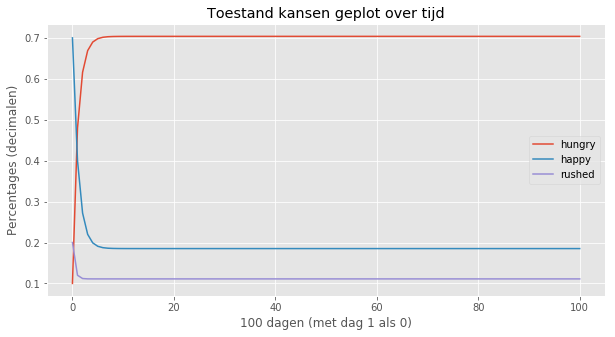

In [36]:
# save all the first states for the 3 states
all_chances = [[], [], []]
all_chances[0].append(orig_vector[0][0])
all_chances[1].append(orig_vector[1][0])
all_chances[2].append(orig_vector[2][0])

next_day_matrix = chance_matrix
for x in range(100):
    # saves the current chances for the day
    current_chances = multiply_matrix(next_day_matrix, orig_vector)
    
    # saves all the current chances in a list
    all_chances[0].append(current_chances[0][0])
    all_chances[1].append(current_chances[1][0])
    all_chances[2].append(current_chances[2][0])
    
    # caculates matrix chances for the next day 
    next_day_matrix = multiply_matrix(next_day_matrix, chance_matrix)

# setting up the plot
plt.title("Toestand kansen geplot over tijd")
plt.xlabel("100 dagen (met dag 1 als 0)")
plt.ylabel("Percentages (decimalen)")
style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

# plotting the graph
states = ['hungry', 'happy', 'rushed']
for state_info in range(len(all_chances)):
    plt.plot(all_chances[state_info], label='{0}'.format(states[state_info]))
plt.legend()
plt.show()


Ook voor de Flumph met 4 toestanden wordt geplot hoe de toestanden zich over de tijd verhouden.


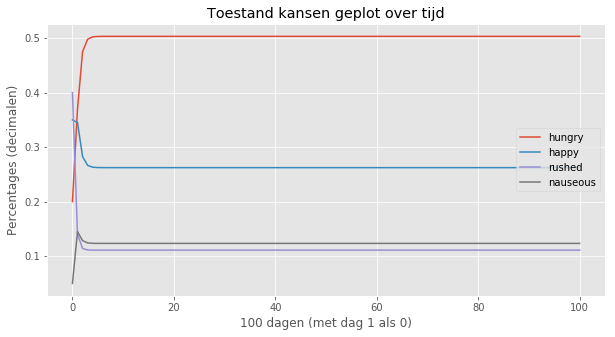

In [37]:
# save all the first states for the 4 states
all_chances = [[], [], [], []]
all_chances[0].append(extended_orig_vector[0][0])
all_chances[1].append(extended_orig_vector[1][0])
all_chances[2].append(extended_orig_vector[2][0])
all_chances[3].append(extended_orig_vector[3][0])

next_day_matrix = extended_chance_matrix
for x in range(100):
    # saves the current chances for the day
    current_chances = multiply_matrix(next_day_matrix, extended_orig_vector)
    
    # saves all the current chances in a list
    all_chances[0].append(current_chances[0][0])
    all_chances[1].append(current_chances[1][0])
    all_chances[2].append(current_chances[2][0])
    all_chances[3].append(current_chances[3][0])
    
    # caculates matrix chances for the next day
    next_day_matrix = multiply_matrix(next_day_matrix, extended_chance_matrix)

# setting up the plot
plt.title("Toestand kansen geplot over tijd")
plt.xlabel("100 dagen (met dag 1 als 0)")
plt.ylabel("Percentages (decimalen)")
style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

# plotting the graph
states = ['hungry', 'happy', 'rushed', 'nauseous']
for state_info in range(len(all_chances)):
    plt.plot(all_chances[state_info], label='{0}'.format(states[state_info]))
plt.legend(loc='right')
plt.show()


Zoals in de bovenstaande grafieken gezien kan worden, wordt de kans op een bepaalde toestand
na een bepaalde tijd constant.

Voor elk scenario kan berekend worden welke toestand op termijn het meest waarschijnlijkst is.  
Wanneer een matrix vaak met zichzelf vermenigvuldigd wordt kan het op termijn voorkomen
dat er een 'steady state' kan worden bereikt.
Hiermee wordt bedoeld dat vanaf een bepaald punt het niet meer uitmaakt of er nog een multiplicatie plaatsvindt
aangezien de matrix niet meer zal veranderen.  
Om dit punt te bereiken en uit te zoeken wanneer dit punt bereikt wordt is hieronder een stukje code geschreven
die deze handeling uitvoerd en de uiteindelijke 'steady states' print.


In [13]:

def is_equal_matrix(matrix_A, matrix_B):
    """returns False when matrix_A and matrix_B are not identical"""
    
    # loop over every row in the matrix
    for i in range(0, len(matrix_A)):
        
        # loop over every column in the matrix
        for j in range(0, len(matrix_B[0])):
            
            if matrix_A[i][j] != matrix_B[i][j]:
                # the two elements are not alike
                return False
    # the two matrices are identical
    return True


def find_steady_state(matrix_A):
    """multiplies the matrix against itself until a steady state is reached"""
    
    n = 3
    last_matrix = multiply_matrix(matrix_A, matrix_A)
    dot_matrix = multiply_matrix(last_matrix, matrix_A)
    
    # while the matrices are not equal continue the multiplication
    while not is_equal_matrix(last_matrix, dot_matrix):
        last_matrix = dot_matrix
        dot_matrix = multiply_matrix(last_matrix, matrix_A)
        n += 1
    
    return dot_matrix, n
    
        
# calculating steady state first flumph
states = ['hungry', 'happy', 'rushed']
steady_state_info = find_steady_state(chance_matrix)
steady_state = steady_state_info[0]
P = steady_state_info[1]

print("First flumph:\nAfter {0} steps the steady state matrix occured\n".format(P - 1))
for state in range(0, len(states)):
    print("{0}: {1}% chance".format(states[state], steady_state[state][0]))


# calculating steady state second flumph
states = ['hungry', 'happy', 'rushed', 'nauseous']
steady_state_info = find_steady_state(extended_chance_matrix)
steady_state = steady_state_info[0]
P = steady_state_info[1]

print("\n\nExtended second flumph:\nAfter {0} steps the steady state matrix occured\n".format(P - 1))
for state in range(0, len(states)):
    print("{0}: {1}% chance".format(states[state], steady_state[state][0]))



First flumph:
After 43 steps the steady state matrix occured

hungry: 0.7037037037037045% chance
happy: 0.18518518518518529% chance
rushed: 0.11111111111111127% chance


Extended second flumph:
After 24 steps the steady state matrix occured

hungry: 0.5030864197530868% chance
happy: 0.26234567901234584% chance
rushed: 0.11111111111111119% chance
nauseous: 0.12345679012345684% chance


### Bayes Rule
De kans dat een Flumph hongerig, tevreden of opgejaagd is kan afhangen van een onbekende, verborgen toestand.  
Een Flumph waarvan we bijvoorbeeld weten dat deze zwanger is,
heeft de volgende kansen voor de drie toestanden: hongerig: 70%, tevreden: 10%, opgejaagd: 20%.  
zwangere flumph =
$\begin{bmatrix}
    0.7\\
    0.1\\
    0.2\\
\end{bmatrix}$  
Voor een Flumph die niet zwanger is zijn de kansen respectievelijk 50%, 35% en 15%.  
niet zwangere flumph =
$\begin{bmatrix}
    0.5\\
    0.35\\
    0.15\\
\end{bmatrix}$  
Gemiddeld zijn Flumphs in 25% van de gevallen zwanger.  
Om te berekenen hoe groot de kans is dat een Flumph zwanger is als hij in een bepaalde toestand zit
kan Bayes Rule worden gebruikt.<br>
Als voorbeeld zal nu eerst de kans op zwanger zijn worden berekend voor een Flumph die hongerig is.  
De formule die hiervoor gebruikt kan worden gaat als volgt:  
$P(Z|+) = \frac{P(+|Z) \cdot P(Z)}{P(+|Z) \cdot P(Z) + P(+|niet\,Z) \cdot P(niet\,Z)}$
<br>
In deze formule staan $P(Z)$ en $P(niet\,Z)$ voor de kans dat een Flumph wel of niet zwanger is.
$P(+|Z)$ staat voor de kans dat de flumph hongerig is als hij/zij zwanger is.
Dit wordt berekend door de kans op de toestand van een zwangere Flumph keer de kans om zwanger te zijn te doen.  
$P(+|niet\,Z)$ staat voor de kans dat de flumph hongerig is als hij/zij niet zwanger is.
Dit wordt berekend door de kans op de toestand van een niet zwangere Flumph keer de kans om niet zwanger te zijn te doen.  
Uiteindelijk wordt dan de variabele $P(Z|+)$ berekend.
Dit is de kans dat de flumph zwanger is als hij/zij hongerig is.  
$
\begin{align}
    P(Z) & = 0.25 \\
    P(niet\,Z) & = 0.75 \\
    P(+|Z) & = 0.7 \cdot 0.25 = 0.175 \\
    P(+|niet\,Z) &= 0.5 \cdot 0.75 = 0.375
\end{align}
$  
Wanneer deze waarden in de formule ingevoerd worden komt het volgende resultaat eruit:  
$P(Z|+) = \frac{0.175 \cdot 0.25}{0.175 \cdot 0.25 + 0.375 \cdot 0.75} = 0.13$  
Ofwel de kans dat een Flumph zwanger is wanneer hij/zij hongerig is is ongeveer 13%.  
In de code hieronder wordt dit proces automatisch gedaan voor alle toestanden van een flumph
en de kansen worden onderaan geprint.

In [11]:
# pregnant flumph
is_pregnant_chance = 0.25

# chance vector for a pregnant flumph
pregnant_flumph = [[0.7],
                   [0.1],
                   [0.2]]

# chance vector for a non-pregnant flumph
not_pregnant_flumph = [[0.5],
                       [0.35],
                       [0.15]]

# getting all the states
all_states = ['hungry', 'happy', 'rushed']

# loop over every state and calculate the chance
for state in range(0, len(all_states)):
    # calculate the not pregnant chance
    not_pregnant_chance = 1.0 - is_pregnant_chance
    
    # calculate the other chances
    pos_state_preg = is_pregnant_chance * pregnant_flumph[state][0]
    pos_state_not_preg = not_pregnant_chance * not_pregnant_flumph[state][0]
    
    # calculate the chance using the formula
    actual_change = (pos_state_preg * is_pregnant_chance) / ((pos_state_preg * is_pregnant_chance) + (pos_state_not_preg * not_pregnant_chance))

    # print the info
    print("There is a {0}% chance on being pregnant while the flumph is {1}".format(round(actual_change * 100), all_states[state]))

There is a 13% chance on being pregnant while the flumph is hungry
There is a 3% chance on being pregnant while the flumph is happy
There is a 13% chance on being pregnant while the flumph is rushed
